In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.metrics import MeanAbsoluteError

import random

In [2]:
df = pd.read_csv("ciro_tahmin.csv")

In [3]:
df.head()

,YilAygun,Gun,Suberef,SatisAdet,Ciro,MagazaSinif,SehirRef,SubeAcilisTarihi,MagazaM2,LokasyonTip,Magaza_Kapalimi,MagazaKapanmaAciklama,LFL_YilAyGun,LFL_Ciro
0,20200510,2020-05-10,1047260005617,NaN,NaN,B,6,2007-08-23,128.0,AVM,1,yok,20190512,23508.0
1,20201207,2020-12-07,1047260008508,7.0,3543.0,C,6,2018-10-01,183.0,AVM,0,NaN,20191209,4551.0
2,20200301,2020-03-01,1047260005617,22.0,12893.0,B,6,2007-08-23,128.0,AVM,0,NaN,20190303,22669.0
3,20211016,2021-10-16,1047260009268,104.0,112933.0,B,35,2019-10-07,195.0,AVM,0,NaN,20201017,52720.0
4,20210531,2021-05-31,1047260005431,185.0,113034.0,A+,34,2007-09-21,262.0,AVM,0,NaN,20200601,39759.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45731 entries, 0 to 45730
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   YilAygun               45731 non-null  int64  
 1   Gun                    45731 non-null  object 
 2   Suberef                45731 non-null  int64  
 3   SatisAdet              40023 non-null  float64
 4   Ciro                   40023 non-null  float64
 5   MagazaSinif            45731 non-null  object 
 6   SehirRef               45731 non-null  int64  
 7   SubeAcilisTarihi       45731 non-null  object 
 8   MagazaM2               45709 non-null  float64
 9   LokasyonTip            45429 non-null  object 
 10  Magaza_Kapalimi        45731 non-null  int64  
 11  MagazaKapanmaAciklama  4056 non-null   object 
 12  LFL_YilAyGun           45731 non-null  int64  
 13  LFL_Ciro               28629 non-null  float64
dtypes: float64(4), int64(5), object(5)
memory usage: 4.9+ 

In [5]:
df.dtypes

YilAygun                   int64
Gun                       object
Suberef                    int64
SatisAdet                float64
Ciro                     float64
MagazaSinif               object
SehirRef                   int64
SubeAcilisTarihi          object
MagazaM2                 float64
LokasyonTip               object
Magaza_Kapalimi            int64
MagazaKapanmaAciklama     object
LFL_YilAyGun               int64
LFL_Ciro                 float64
dtype: object

In [6]:
df.isnull().sum()

YilAygun                     0
Gun                          0
Suberef                      0
SatisAdet                 5708
Ciro                      5708
MagazaSinif                  0
SehirRef                     0
SubeAcilisTarihi             0
MagazaM2                    22
LokasyonTip                302
Magaza_Kapalimi              0
MagazaKapanmaAciklama    41675
LFL_YilAyGun                 0
LFL_Ciro                 17102
dtype: int64

In [7]:
df.shape

(45731, 14)

In [8]:
df.drop("YilAygun", axis = 1, inplace = True)

In [9]:
df.duplicated().sum()

0

In [10]:
df.dtypes

Gun                       object
Suberef                    int64
SatisAdet                float64
Ciro                     float64
MagazaSinif               object
SehirRef                   int64
SubeAcilisTarihi          object
MagazaM2                 float64
LokasyonTip               object
Magaza_Kapalimi            int64
MagazaKapanmaAciklama     object
LFL_YilAyGun               int64
LFL_Ciro                 float64
dtype: object

In [11]:
df.sort_values(by = ["Gun"], inplace = True)

In [12]:
df.head()

,Gun,Suberef,SatisAdet,Ciro,MagazaSinif,SehirRef,SubeAcilisTarihi,MagazaM2,LokasyonTip,Magaza_Kapalimi,MagazaKapanmaAciklama,LFL_YilAyGun,LFL_Ciro
15589,2019-01-01,1047260005973,24.0,10915.0,A,6,2010-02-12,172.0,AVM,0,NaN,20180101,NaN
21210,2019-01-01,1047260005617,33.0,12370.0,B,6,2007-08-23,128.0,AVM,0,NaN,20180101,NaN
20857,2019-01-01,1047260005833,27.0,17653.0,A,61,2008-06-21,213.0,AVM,0,NaN,20180101,NaN
21213,2019-01-01,1047260005974,15.0,8819.0,B,6,2002-03-15,143.0,AVM,0,NaN,20180101,NaN
20157,2019-01-01,1047260005726,8.0,4658.0,C,48,2011-02-03,52.0,AVM,0,NaN,20180101,NaN


In [13]:
df.tail()

,Gun,Suberef,SatisAdet,Ciro,MagazaSinif,SehirRef,SubeAcilisTarihi,MagazaM2,LokasyonTip,Magaza_Kapalimi,MagazaKapanmaAciklama,LFL_YilAyGun,LFL_Ciro
4080,2022-04-28,1047260005432,56.0,87770.0,A,6,2012-12-01,187.0,AVM,0,NaN,20210429,61416.0
34239,2022-04-28,1047260009268,96.0,131666.0,B,35,2019-10-07,195.0,AVM,0,NaN,20210429,35492.0
1910,2022-04-28,1047260004733,66.0,96203.0,B,34,2012-03-21,245.0,AVM,0,NaN,20210429,31527.0
4900,2022-04-28,1047260005431,132.0,211842.0,A+,34,2007-09-21,262.0,AVM,0,NaN,20210429,79299.0
45487,2022-04-28,1047260005829,49.0,61614.0,C,34,2011-08-23,85.0,AVM,0,NaN,20210429,27304.0


### Ciro için eksik değerler LFL_cirodan çekilebilir. Satış Adetindeki eksik değer yakın zaman aralığında belirlenen bir eşik dahilinde birim fiyat hesabı ile ciro/birim fiyattan çekilebilir.
### 22 adet mağazam2 eksik benzer yapıdaki mağazalardan çekilebilir.
### Lokasyon tipi mod ile doldurulabilir. Onun haricinde eksik lokasyon gözleminin etkisine bakmak gerkeli.

In [14]:
missing_values = df['Ciro'].isnull()

In [15]:
df.loc[missing_values, "Ciro"] = df.loc[missing_values, "LFL_Ciro"]

In [16]:
df.isnull().sum()

Gun                          0
Suberef                      0
SatisAdet                 5708
Ciro                      1454
MagazaSinif                  0
SehirRef                     0
SubeAcilisTarihi             0
MagazaM2                    22
LokasyonTip                302
Magaza_Kapalimi              0
MagazaKapanmaAciklama    41675
LFL_YilAyGun                 0
LFL_Ciro                 17102
dtype: int64

### Mağaza m2 eksik değeri

In [17]:
df[df["MagazaM2"].isnull()]

,Gun,Suberef,SatisAdet,Ciro,MagazaSinif,SehirRef,SubeAcilisTarihi,MagazaM2,LokasyonTip,Magaza_Kapalimi,MagazaKapanmaAciklama,LFL_YilAyGun,LFL_Ciro
8981,2022-04-07,1047260011362,12.0,18638.0,C,7,2022-04-03,NaN,AVM,0,NaN,20210408,NaN
25511,2022-04-08,1047260011362,10.0,13200.0,C,7,2022-04-03,NaN,AVM,0,NaN,20210409,NaN
35114,2022-04-09,1047260011362,33.0,41939.0,C,7,2022-04-03,NaN,AVM,0,NaN,20210410,NaN
40477,2022-04-10,1047260011362,19.0,28793.0,C,7,2022-04-03,NaN,AVM,0,NaN,20210411,NaN
15852,2022-04-11,1047260011362,24.0,28454.0,C,7,2022-04-03,NaN,AVM,0,NaN,20210412,NaN
40019,2022-04-12,1047260011362,14.0,21028.0,C,7,2022-04-03,NaN,AVM,0,NaN,20210413,NaN
32200,2022-04-13,1047260011362,21.0,20549.0,C,7,2022-04-03,NaN,AVM,0,NaN,20210414,NaN
39178,2022-04-14,1047260011362,19.0,24385.0,C,7,2022-04-03,NaN,AVM,0,NaN,20210415,NaN
4689,2022-04-15,1047260011362,45.0,42825.0,C,7,2022-04-03,NaN,AVM,0,NaN,20210416,NaN
9811,2022-04-16,1047260011362,48.0,70572.0,C,7,2022-04-03,NaN,AVM,0,NaN,20210417,NaN


### sube_ref = 1047260011362 mağaza sıkıntılı mağazalar unique olduğu için mağaza sınıfı C olan ve AVM'de olan bir mağazanın ortalma büyüklüğü ile manipüle edeceğim.

In [18]:
missing_m2 = df["MagazaM2"].isnull()

In [19]:
df[(df["MagazaSinif"] == "C") & (df["LokasyonTip"] == "AVM")]["MagazaM2"].mean()

153.50511707241432

In [20]:
a = df[(df["MagazaSinif"] == "C") & (df["LokasyonTip"] == "AVM")]["MagazaM2"].mean()

In [21]:
df.loc[missing_m2, "MagazaM2"] = a

In [22]:
df.isnull().sum()

Gun                          0
Suberef                      0
SatisAdet                 5708
Ciro                      1454
MagazaSinif                  0
SehirRef                     0
SubeAcilisTarihi             0
MagazaM2                     0
LokasyonTip                302
Magaza_Kapalimi              0
MagazaKapanmaAciklama    41675
LFL_YilAyGun                 0
LFL_Ciro                 17102
dtype: int64

#### Lokasyon Tipi

In [23]:
df["LokasyonTip"].value_counts()

LokasyonTip
AVM      43001
CADDE     2428
Name: count, dtype: int64

In [24]:
df[(df["LokasyonTip"] == "CADDE")]["SehirRef"].value_counts()

SehirRef
1     1214
35    1214
Name: count, dtype: int64

In [25]:
df[(df["LokasyonTip"].isnull())]["SehirRef"].value_counts()

SehirRef
34    302
Name: count, dtype: int64

**1 ve 35 referanslı şehirlerde eşit dağılmış Cadde tipi mağazalar bulunmakta fakat ek olarak başka dengeli bir sınıf mevcut değil. Patterni korumak için 34 şehir refli eksik değerleri AVM olarak basalım.**

In [26]:
missing_location = df["LokasyonTip"].isnull()

In [27]:
df.loc[missing_location, "LokasyonTip"] = "AVM"

In [28]:
df.isnull().sum()

Gun                          0
Suberef                      0
SatisAdet                 5708
Ciro                      1454
MagazaSinif                  0
SehirRef                     0
SubeAcilisTarihi             0
MagazaM2                     0
LokasyonTip                  0
Magaza_Kapalimi              0
MagazaKapanmaAciklama    41675
LFL_YilAyGun                 0
LFL_Ciro                 17102
dtype: int64

### Ordinal Mapping for Magaza Sınıf

In [29]:
df["MagazaSinif"].value_counts()

MagazaSinif
A     16105
C     12920
A+     8498
B      8208
Name: count, dtype: int64

In [30]:
label_mapping = {'C': 0, 'B': 1, 'A': 2, 'A+': 3}

In [31]:
df['MagazaSinifEncoded'] = df['MagazaSinif'].map(label_mapping)

In [32]:
df["MagazaSinifEncoded"].value_counts()

MagazaSinifEncoded
2    16105
0    12920
3     8498
1     8208
Name: count, dtype: int64

### Label Encoding for LokasyonTip

In [33]:
from sklearn.preprocessing import LabelEncoder

In [34]:
df["LokasyonTip"].value_counts()

LokasyonTip
AVM      43303
CADDE     2428
Name: count, dtype: int64

In [35]:
label_encoder = LabelEncoder()

In [36]:
df['LokasyonTipEncoded'] = label_encoder.fit_transform(df['LokasyonTip'])

### AVM = 0, Cadde = 1

In [37]:
df["LokasyonTipEncoded"].value_counts()

LokasyonTipEncoded
0    43303
1     2428
Name: count, dtype: int64

### Correlation Matrix & Aggregation Statistics

In [38]:
num_cols = ["SatisAdet", "Ciro", "MagazaSinifEncoded", "MagazaM2", "LokasyonTipEncoded" ,"Magaza_Kapalimi"]

In [39]:
df[num_cols].describe([0, 0.05, 0.50, 0.95, 0.99]).T

,count,mean,std,min,0%,5%,50%,95%,99%,max
SatisAdet,40023.0,60.785673,52.466178,1.0,1.0,10.0,47.0,159.0,251.00,1405.0
Ciro,44277.0,38239.681505,34369.701215,29.0,29.0,5978.4,28717.0,101912.8,169225.76,797362.0
MagazaSinifEncoded,45731.0,1.441298,1.087784,0.0,0.0,0.0,2.0,3.0,3.00,3.0
MagazaM2,45731.0,194.793031,56.918057,52.0,52.0,85.0,187.0,308.0,332.00,332.0
LokasyonTipEncoded,45731.0,0.053093,0.224222,0.0,0.0,0.0,0.0,1.0,1.00,1.0
Magaza_Kapalimi,45731.0,0.088693,0.284303,0.0,0.0,0.0,0.0,1.0,1.00,1.0


In [40]:
corr = df[num_cols].corr()

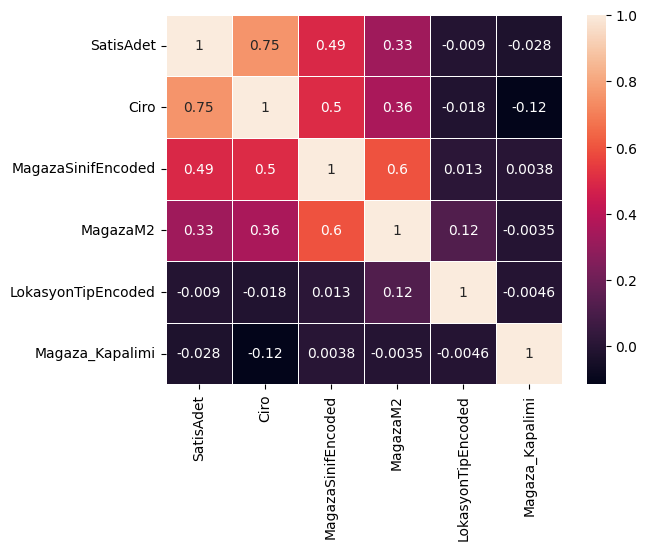

In [41]:
sns.heatmap(corr,
            annot=True,
            linewidths=0.4,
            annot_kws={"size": 10})

plt.xticks(rotation=90)
plt.yticks(rotation=0) 
plt.show()

#### Mağaza AÇık KApalı küçük bakış

In [42]:
df[(~df["SatisAdet"].isnull()) & (df["Magaza_Kapalimi"] == 1)]

,Gun,Suberef,SatisAdet,Ciro,MagazaSinif,SehirRef,SubeAcilisTarihi,MagazaM2,LokasyonTip,Magaza_Kapalimi,MagazaKapanmaAciklama,LFL_YilAyGun,LFL_Ciro,MagazaSinifEncoded,LokasyonTipEncoded
19469,2019-10-29,1047260005432,59.0,28864.0,A,6,2012-12-01,187.0,AVM,1,yok,20181029,NaN,2,0
4760,2020-03-19,1047260004733,1.0,749.0,B,34,2012-03-21,245.0,AVM,1,yok,20190321,11886.0,1,0
25623,2020-05-20,1047260005829,4.0,2596.0,C,34,2011-08-23,85.0,AVM,1,yok,20190522,15208.0,0,0
38310,2020-05-20,1047260005503,4.0,2096.0,A,34,2013-03-01,180.0,AVM,1,yok,20190522,31727.0,2,0
19320,2020-05-27,1047260005361,2.0,648.0,C,34,2012-12-01,222.0,AVM,1,yok,20190607,8553.0,0,0
15891,2020-12-05,1047260008969,17.0,10418.0,C,34,2019-08-03,160.0,AVM,1,yok,20191207,10887.0,0,0
1584,2020-12-06,1047260008969,1.0,899.0,C,34,2019-08-03,160.0,AVM,1,yok,20191208,12090.0,0,0
7319,2020-12-12,1047260008969,3.0,3147.0,C,34,2019-08-03,160.0,AVM,1,yok,20191214,14585.0,0,0
44042,2020-12-13,1047260008969,2.0,553.0,C,34,2019-08-03,160.0,AVM,1,yok,20191215,15853.0,0,0
19494,2020-12-19,1047260008969,7.0,3730.0,C,34,2019-08-03,160.0,AVM,1,yok,20191221,15942.0,0,0


In [43]:
df.loc[(~df["SatisAdet"].isnull()) & (df["Magaza_Kapalimi"] == 1), "Magaza_Kapalimi"] = 0

In [44]:
df[df["Magaza_Kapalimi"] == 1]

,Gun,Suberef,SatisAdet,Ciro,MagazaSinif,SehirRef,SubeAcilisTarihi,MagazaM2,LokasyonTip,Magaza_Kapalimi,MagazaKapanmaAciklama,LFL_YilAyGun,LFL_Ciro,MagazaSinifEncoded,LokasyonTipEncoded
40336,2019-02-05,1047260005722,NaN,NaN,A,7,2011-06-01,209.0,AVM,1,yok,20180206,NaN,2,0
3632,2019-02-06,1047260005722,NaN,NaN,A,7,2011-06-01,209.0,AVM,1,yok,20180207,NaN,2,0
7385,2019-02-06,1047260005974,NaN,NaN,B,6,2002-03-15,143.0,AVM,1,yok,20180207,NaN,1,0
25275,2019-02-07,1047260005974,NaN,NaN,B,6,2002-03-15,143.0,AVM,1,yok,20180208,NaN,1,0
24915,2019-02-07,1047260005722,NaN,NaN,A,7,2011-06-01,209.0,AVM,1,yok,20180208,NaN,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12792,2021-03-08,1047260005617,NaN,22400.0,B,6,2007-08-23,128.0,AVM,1,yok,20200309,22400.0,1,0
38336,2021-03-09,1047260005617,NaN,14286.0,B,6,2007-08-23,128.0,AVM,1,yok,20200310,14286.0,1,0
25698,2021-03-10,1047260005617,NaN,19113.0,B,6,2007-08-23,128.0,AVM,1,yok,20200311,19113.0,1,0
39614,2021-04-03,1047260005617,NaN,NaN,B,6,2007-08-23,128.0,AVM,1,yok,20200404,NaN,1,0


In [45]:
df[(~df["Ciro"].isnull()) & (df["Magaza_Kapalimi"] == 1)]

,Gun,Suberef,SatisAdet,Ciro,MagazaSinif,SehirRef,SubeAcilisTarihi,MagazaM2,LokasyonTip,Magaza_Kapalimi,MagazaKapanmaAciklama,LFL_YilAyGun,LFL_Ciro,MagazaSinifEncoded,LokasyonTipEncoded
13359,2020-02-20,1047260005431,NaN,25339.0,A+,34,2007-09-21,262.0,AVM,1,RENOVASYON,20190221,25339.0,3,0
25592,2020-02-21,1047260005431,NaN,25057.0,A+,34,2007-09-21,262.0,AVM,1,RENOVASYON,20190222,25057.0,3,0
22269,2020-02-22,1047260005431,NaN,44557.0,A+,34,2007-09-21,262.0,AVM,1,RENOVASYON,20190223,44557.0,3,0
36209,2020-02-23,1047260005431,NaN,39046.0,A+,34,2007-09-21,262.0,AVM,1,RENOVASYON,20190224,39046.0,3,0
28234,2020-02-24,1047260005431,NaN,24959.0,A+,34,2007-09-21,262.0,AVM,1,RENOVASYON,20190225,24959.0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17474,2021-03-06,1047260005617,NaN,32527.0,B,6,2007-08-23,128.0,AVM,1,yok,20200307,32527.0,1,0
26956,2021-03-07,1047260005617,NaN,31365.0,B,6,2007-08-23,128.0,AVM,1,yok,20200308,31365.0,1,0
12792,2021-03-08,1047260005617,NaN,22400.0,B,6,2007-08-23,128.0,AVM,1,yok,20200309,22400.0,1,0
38336,2021-03-09,1047260005617,NaN,14286.0,B,6,2007-08-23,128.0,AVM,1,yok,20200310,14286.0,1,0


### Mağazaların Çoğunun ya ciro ya da Satiş adet değeri ya da her iki değeri de mevcut aynı zamanda kapalı gözüküyorlar. Burada tezat bir durum var.

In [46]:
sub = ["Gun", "Suberef","SatisAdet", "Ciro", "MagazaSinif", "SehirRef", "MagazaM2", "LokasyonTip"]

In [47]:
sub_df = df[sub]

In [48]:
sub_df

,Gun,Suberef,SatisAdet,Ciro,MagazaSinif,SehirRef,MagazaM2,LokasyonTip
15589,2019-01-01,1047260005973,24.0,10915.0,A,6,172.0,AVM
21210,2019-01-01,1047260005617,33.0,12370.0,B,6,128.0,AVM
20857,2019-01-01,1047260005833,27.0,17653.0,A,61,213.0,AVM
21213,2019-01-01,1047260005974,15.0,8819.0,B,6,143.0,AVM
20157,2019-01-01,1047260005726,8.0,4658.0,C,48,52.0,AVM
...,...,...,...,...,...,...,...,...
4080,2022-04-28,1047260005432,56.0,87770.0,A,6,187.0,AVM
34239,2022-04-28,1047260009268,96.0,131666.0,B,35,195.0,AVM
1910,2022-04-28,1047260004733,66.0,96203.0,B,34,245.0,AVM
4900,2022-04-28,1047260005431,132.0,211842.0,A+,34,262.0,AVM


In [49]:
sub_df["SehirRef"].value_counts()

SehirRef
34    21531
6      8497
35     4755
7      2450
16     2428
61     1214
48     1214
55     1214
33     1214
1      1214
Name: count, dtype: int64

In [50]:
sub_df

,Gun,Suberef,SatisAdet,Ciro,MagazaSinif,SehirRef,MagazaM2,LokasyonTip
15589,2019-01-01,1047260005973,24.0,10915.0,A,6,172.0,AVM
21210,2019-01-01,1047260005617,33.0,12370.0,B,6,128.0,AVM
20857,2019-01-01,1047260005833,27.0,17653.0,A,61,213.0,AVM
21213,2019-01-01,1047260005974,15.0,8819.0,B,6,143.0,AVM
20157,2019-01-01,1047260005726,8.0,4658.0,C,48,52.0,AVM
...,...,...,...,...,...,...,...,...
4080,2022-04-28,1047260005432,56.0,87770.0,A,6,187.0,AVM
34239,2022-04-28,1047260009268,96.0,131666.0,B,35,195.0,AVM
1910,2022-04-28,1047260004733,66.0,96203.0,B,34,245.0,AVM
4900,2022-04-28,1047260005431,132.0,211842.0,A+,34,262.0,AVM


In [51]:
sub_df["Gun"] = pd.to_datetime(sub_df["Gun"])

C:\Users\Erkut\AppData\Local\Temp\ipykernel_13500\924034514.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_df["Gun"] = pd.to_datetime(sub_df["Gun"])


In [52]:
sub_df = sub_df.set_index("Gun")

In [53]:
grouped_data = sub_df.groupby(['MagazaSinif', "LokasyonTip", "SehirRef"]).resample('D').agg({
    'SatisAdet': 'mean',
    'Ciro': 'mean',
    'MagazaM2': 'mean',
    'Suberef': 'nunique',  # You might want to adjust this depending on your use case
}).reset_index()

In [54]:
grouped_data

,MagazaSinif,LokasyonTip,SehirRef,Gun,SatisAdet,Ciro,MagazaM2,Suberef
0,A,AVM,6,2019-01-01,33.333333,16433.000000,211.0,3
1,A,AVM,6,2019-01-02,23.000000,14234.000000,211.0,3
2,A,AVM,6,2019-01-03,124.666667,57801.666667,211.0,3
3,A,AVM,6,2019-01-04,69.666667,40676.000000,211.0,3
4,A,AVM,6,2019-01-05,88.000000,43127.666667,211.0,3
...,...,...,...,...,...,...,...,...
22982,C,AVM,48,2022-04-24,26.000000,37904.000000,52.0,1
22983,C,AVM,48,2022-04-25,24.000000,35357.000000,52.0,1
22984,C,AVM,48,2022-04-26,13.000000,25887.000000,52.0,1
22985,C,AVM,48,2022-04-27,33.000000,53617.000000,52.0,1


In [55]:
grouped_data.dtypes

MagazaSinif            object
LokasyonTip            object
SehirRef                int64
Gun            datetime64[ns]
SatisAdet             float64
Ciro                  float64
MagazaM2              float64
Suberef                 int64
dtype: object

In [56]:
grouped_data = grouped_data.set_index("Gun")

In [57]:
grouped_data.isnull().sum()

MagazaSinif       0
LokasyonTip       0
SehirRef          0
SatisAdet      2651
Ciro            609
MagazaM2          0
Suberef           0
dtype: int64

In [58]:
grouped_data[grouped_data["SatisAdet"].isnull()]["SehirRef"].value_counts()

SehirRef
35    597
34    503
6     407
16    312
48    142
7     139
33    139
61    139
55    139
1     134
Name: count, dtype: int64

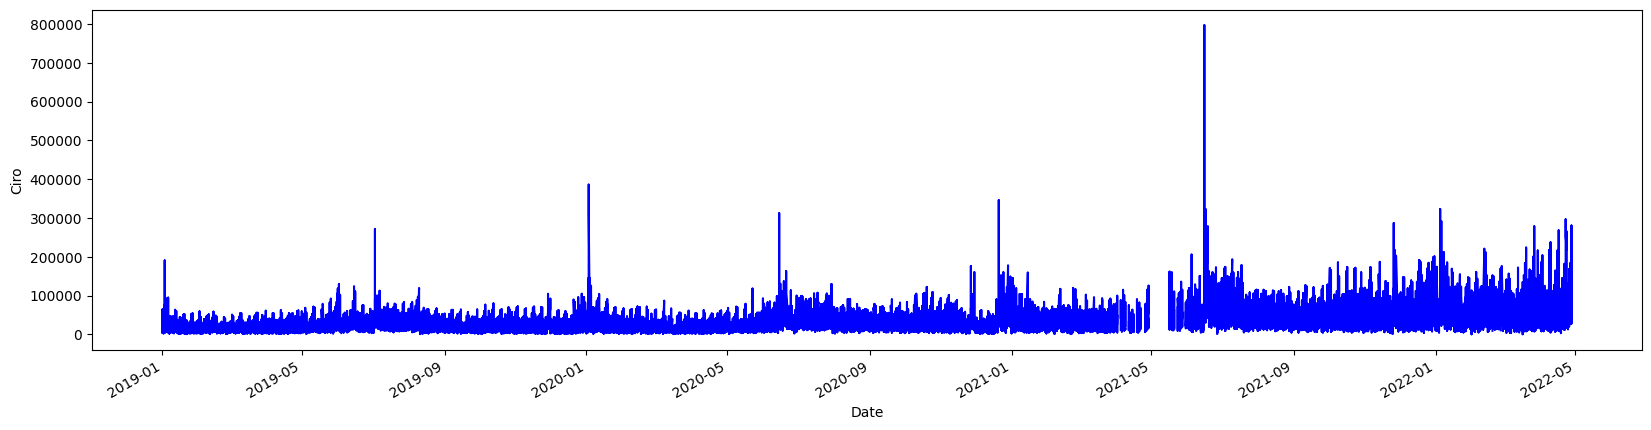

In [59]:
grouped_data["Ciro"].plot(color = "blue", figsize=(20, 5))
    
plt.xlabel("Date")
plt.ylabel("Ciro")
    
plt.show()

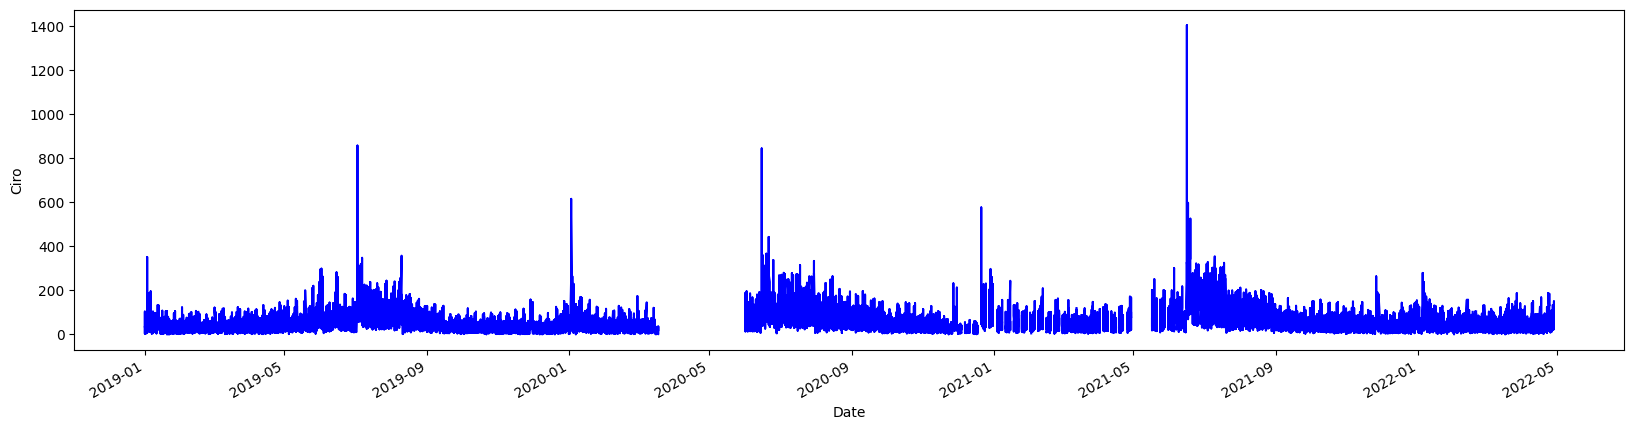

In [60]:
grouped_data["SatisAdet"].plot(color = "blue", figsize=(20, 5))
    
plt.xlabel("Date")
plt.ylabel("Ciro")
    
plt.show()

In [61]:
grouped_data['SatisAdet']= grouped_data['SatisAdet'].fillna(method ='bfill')

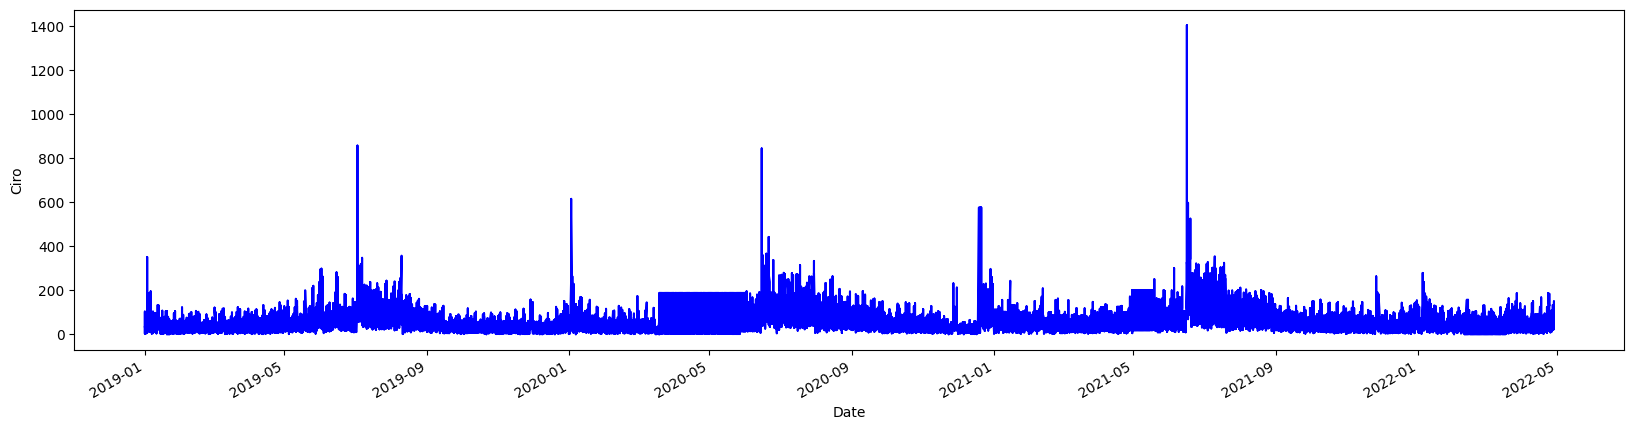

In [62]:
grouped_data["SatisAdet"].plot(color = "blue", figsize=(20, 5))
    
plt.xlabel("Date")
plt.ylabel("Ciro")
    
plt.show()

In [63]:
grouped_data['Ciro']= grouped_data['Ciro'].fillna(method ='bfill')

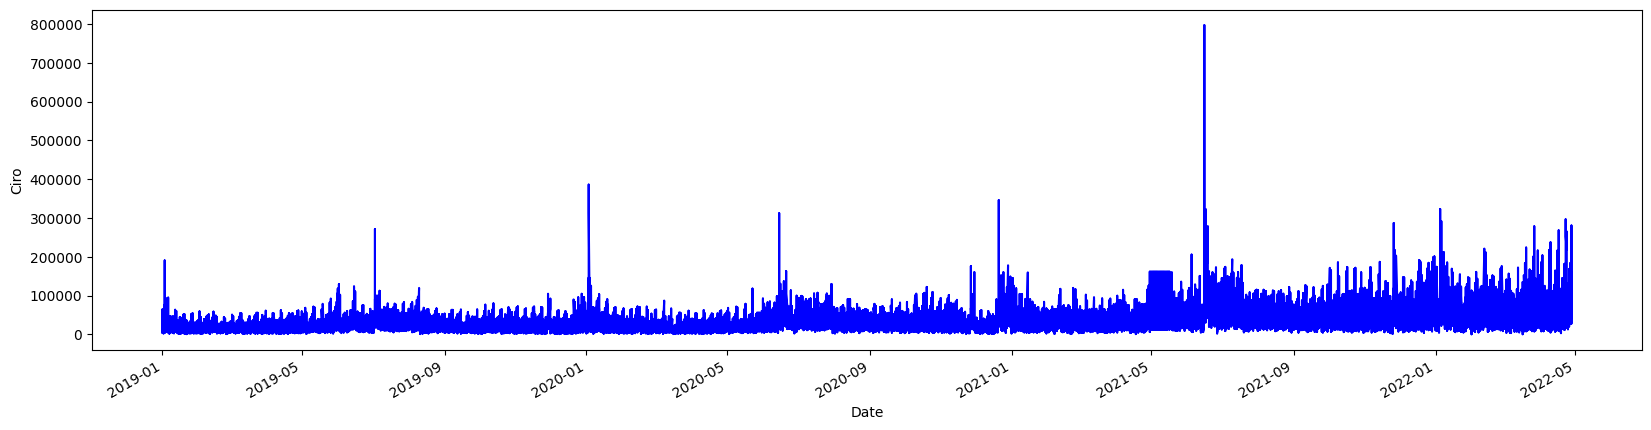

In [64]:
grouped_data["Ciro"].plot(color = "blue", figsize=(20, 5))
    
plt.xlabel("Date")
plt.ylabel("Ciro")
    
plt.show()

### Encoding

In [65]:
df_last = grouped_data.drop("Suberef", axis = 1)

In [66]:
df_last.dtypes

MagazaSinif     object
LokasyonTip     object
SehirRef         int64
SatisAdet      float64
Ciro           float64
MagazaM2       float64
dtype: object

In [67]:
df_last["SehirRef"].astype(object)

Gun
2019-01-01     6
2019-01-02     6
2019-01-03     6
2019-01-04     6
2019-01-05     6
              ..
2022-04-24    48
2022-04-25    48
2022-04-26    48
2022-04-27    48
2022-04-28    48
Name: SehirRef, Length: 22987, dtype: object

In [68]:
df_last['LokasyonTip'] = label_encoder.fit_transform(df_last['LokasyonTip'])

In [69]:
label_mapping = {'C': 0, 'B': 1, 'A': 2, 'A+': 3}

In [70]:
df_last['MagazaSinif'] = df_last['MagazaSinif'].map(label_mapping)

In [71]:
df_last.head()

,MagazaSinif,LokasyonTip,SehirRef,SatisAdet,Ciro,MagazaM2
Gun,,,,,,
2019-01-01,2,0,6,33.333333,16433.000000,211.0
2019-01-02,2,0,6,23.000000,14234.000000,211.0
2019-01-03,2,0,6,124.666667,57801.666667,211.0
2019-01-04,2,0,6,69.666667,40676.000000,211.0
2019-01-05,2,0,6,88.000000,43127.666667,211.0


In [72]:
df_last = pd.get_dummies(df_last, columns=['SehirRef'], prefix='SehirRef', drop_first = True)

In [115]:
df_last = df_last.astype("float64")

In [117]:
def df_to_X_y(df, window_size=5):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [[a] for a in df_as_np[i:i+window_size]]
    X.append(row)
    label = df_as_np[i+window_size]
    y.append(label)
  return np.array(X), np.array(y)

In [118]:
y = df_last["Ciro"]

In [119]:
sequences = []
for i in range(len(X) - 7 + 1):
    sequence = X[i:i + 7].values
    sequences.append(sequence)

print(np.array(sequences))

[[[  2.           0.          33.33333333 ...   0.           0.
     0.        ]
  [  2.           0.          23.         ...   0.           0.
     0.        ]
  [  2.           0.         124.66666667 ...   0.           0.
     0.        ]
  ...
  [  2.           0.          88.         ...   0.           0.
     0.        ]
  [  2.           0.          60.66666667 ...   0.           0.
     0.        ]
  [  2.           0.          40.66666667 ...   0.           0.
     0.        ]]

 [[  2.           0.          23.         ...   0.           0.
     0.        ]
  [  2.           0.         124.66666667 ...   0.           0.
     0.        ]
  [  2.           0.          69.66666667 ...   0.           0.
     0.        ]
  ...
  [  2.           0.          60.66666667 ...   0.           0.
     0.        ]
  [  2.           0.          40.66666667 ...   0.           0.
     0.        ]
  [  2.           0.          41.66666667 ...   0.           0.
     0.        ]]

 [[  2.     

In [120]:
sequences2 = []
for i in range(len(y) - 7 + 1):
    sequence2 = y[i:i + 7].values
    sequences2.append(sequence2)

print(np.array(sequences2))

[[16433.         14234.         57801.66666667 ... 43127.66666667
  28427.33333333 18176.66666667]
 [14234.         57801.66666667 40676.         ... 28427.33333333
  18176.66666667 24549.        ]
 [57801.66666667 40676.         43127.66666667 ... 18176.66666667
  24549.         20864.33333333]
 ...
 [30691.         23075.         36941.         ... 37904.
  35357.         25887.        ]
 [23075.         36941.         30145.         ... 35357.
  25887.         53617.        ]
 [36941.         30145.         37904.         ... 25887.
  53617.         43016.        ]]


In [121]:
arr1 = np.array(sequences)

In [122]:
arr2 = np.array(sequences2)

In [123]:
X_train = arr1[:-1, :]

In [124]:
y_train = arr2[:-1, :]

In [137]:
y_train.shape

(22980, 7)

In [125]:
X_test = arr1[-1, :]

In [126]:
y_test = arr2[-1, :]

In [127]:
layer1 = 64
layer2 = 32
window_size = 7
batch_size = 64
epochs = 100
learning_rate = 0.01
validation_split = 0.2

In [129]:
input_shape = X_train.shape

In [130]:
def autoencoder(input_shape):
  inputs = tf.keras.layers.Input(shape = (input_shape[1], input_shape[2]))

  encoded = tf.keras.layers.LSTM(layer1, activation = "tanh", return_sequences = True)(inputs)
  encoded = tf.keras.layers.LSTM(layer2, activation = "tanh", return_sequences = False)(encoded)

  decoded = tf.keras.layers.RepeatVector(input_shape[1])(encoded)
  decoded = tf.keras.layers.LSTM(layer2, activation = "tanh", return_sequences = True)(decoded)
  decoded = tf.keras.layers.LSTM(layer1, activation = "tanh", return_sequences = True)(decoded)

  decoded = tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(input_shape[2]))(decoded)

  aencoder = tf.keras.models.Model(inputs, decoded)

 

  aencoder.compile(optimizer = Adam(learning_rate = learning_rate), loss = "mae", metrics=[MeanAbsoluteError()])




  return aencoder

In [131]:
def lr_schedule(epoch, learning_rate):
    if epoch < 25:
        return learning_rate
    elif epoch < 50:
        return learning_rate * 0.1
    elif epoch < 75:
        return learning_rate * 0.01
    else:
        return learning_rate * 0.001

In [132]:
lr_scheduler = LearningRateScheduler(lambda epoch: lr_schedule(epoch, learning_rate))

In [133]:
cp = ModelCheckpoint("LSTM/", save_best_only= True)

In [134]:
LSTM = autoencoder(input_shape)

In [135]:
LSTM.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 7, 13)]           0         
                                                                 
 lstm_4 (LSTM)               (None, 7, 64)             19968     
                                                                 
 lstm_5 (LSTM)               (None, 32)                12416     
                                                                 
 repeat_vector_1 (RepeatVect  (None, 7, 32)            0         
 or)                                                             
                                                                 
 lstm_6 (LSTM)               (None, 7, 32)             8320      
                                                                 
 lstm_7 (LSTM)               (None, 7, 64)             24832     
                                                           

In [141]:
X = df_last.drop("Ciro", axis = 1)

In [142]:
X.head()

,MagazaSinif,LokasyonTip,SatisAdet,MagazaM2,SehirRef_6,SehirRef_7,SehirRef_16,SehirRef_33,SehirRef_34,SehirRef_35,SehirRef_48,SehirRef_55,SehirRef_61
Gun,,,,,,,,,,,,,
2019-01-01,2.0,0.0,33.333333,211.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2019-01-02,2.0,0.0,23.000000,211.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2019-01-03,2.0,0.0,124.666667,211.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2019-01-04,2.0,0.0,69.666667,211.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2019-01-05,2.0,0.0,88.000000,211.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [145]:
y = df_last[["Ciro"]]

In [146]:
y

,Ciro
Gun,
2019-01-01,16433.000000
2019-01-02,14234.000000
2019-01-03,57801.666667
2019-01-04,40676.000000
2019-01-05,43127.666667
...,...
2022-04-24,37904.000000
2022-04-25,35357.000000
2022-04-26,25887.000000


In [148]:
sequences = []
for i in range(len(X) - 7 + 1):
    sequence = X[i:i + 7].values
    sequences.append(sequence)

print(np.array(sequences))

[[[  2.           0.          33.33333333 ...   0.           0.
     0.        ]
  [  2.           0.          23.         ...   0.           0.
     0.        ]
  [  2.           0.         124.66666667 ...   0.           0.
     0.        ]
  ...
  [  2.           0.          88.         ...   0.           0.
     0.        ]
  [  2.           0.          60.66666667 ...   0.           0.
     0.        ]
  [  2.           0.          40.66666667 ...   0.           0.
     0.        ]]

 [[  2.           0.          23.         ...   0.           0.
     0.        ]
  [  2.           0.         124.66666667 ...   0.           0.
     0.        ]
  [  2.           0.          69.66666667 ...   0.           0.
     0.        ]
  ...
  [  2.           0.          60.66666667 ...   0.           0.
     0.        ]
  [  2.           0.          40.66666667 ...   0.           0.
     0.        ]
  [  2.           0.          41.66666667 ...   0.           0.
     0.        ]]

 [[  2.     

In [149]:
sequences2 = []
for i in range(len(y) - 7 + 1):
    sequence2 = y[i:i + 7].values
    sequences2.append(sequence2)

print(np.array(sequences2))

[[[16433.        ]
  [14234.        ]
  [57801.66666667]
  ...
  [43127.66666667]
  [28427.33333333]
  [18176.66666667]]

 [[14234.        ]
  [57801.66666667]
  [40676.        ]
  ...
  [28427.33333333]
  [18176.66666667]
  [24549.        ]]

 [[57801.66666667]
  [40676.        ]
  [43127.66666667]
  ...
  [18176.66666667]
  [24549.        ]
  [20864.33333333]]

 ...

 [[30691.        ]
  [23075.        ]
  [36941.        ]
  ...
  [37904.        ]
  [35357.        ]
  [25887.        ]]

 [[23075.        ]
  [36941.        ]
  [30145.        ]
  ...
  [35357.        ]
  [25887.        ]
  [53617.        ]]

 [[36941.        ]
  [30145.        ]
  [37904.        ]
  ...
  [25887.        ]
  [53617.        ]
  [43016.        ]]]


In [150]:
arr1 = np.array(sequences)

In [151]:
arr2 = np.array(sequences2)

In [152]:
X_train = arr1[:-1, :]

In [153]:
y_train = arr2[:-1, :]

In [190]:
X_train

array([[[  2.        ,   0.        ,  33.33333333, ...,   0.        ,
           0.        ,   0.        ],
        [  2.        ,   0.        ,  23.        , ...,   0.        ,
           0.        ,   0.        ],
        [  2.        ,   0.        , 124.66666667, ...,   0.        ,
           0.        ,   0.        ],
        ...,
        [  2.        ,   0.        ,  88.        , ...,   0.        ,
           0.        ,   0.        ],
        [  2.        ,   0.        ,  60.66666667, ...,   0.        ,
           0.        ,   0.        ],
        [  2.        ,   0.        ,  40.66666667, ...,   0.        ,
           0.        ,   0.        ]],

       [[  2.        ,   0.        ,  23.        , ...,   0.        ,
           0.        ,   0.        ],
        [  2.        ,   0.        , 124.66666667, ...,   0.        ,
           0.        ,   0.        ],
        [  2.        ,   0.        ,  69.66666667, ...,   0.        ,
           0.        ,   0.        ],
        ...,


In [191]:
X_test = arr1[-1:, :]

In [193]:
X_test.shape

(1, 7, 13)

In [194]:
y_test = arr2[-1:, :]

In [195]:
y_test.shape

(1, 7, 1)

In [196]:
X_test.shape

(1, 7, 13)

In [197]:
X_train.shape

(22980, 7, 13)

In [160]:
y_train.shape

(22980, 7, 1)

In [178]:
layer1 = 64
layer2 = 32
window_size = 7
batch_size = 128
epochs = 200
learning_rate = 0.01
validation_split = 0.2

In [179]:
def autoencoder(input_shape):
  inputs = tf.keras.layers.Input(shape = (input_shape[1], input_shape[2]))

  encoded = tf.keras.layers.LSTM(layer1, activation = "tanh", return_sequences = True)(inputs)
  encoded = tf.keras.layers.LSTM(layer2, activation = "tanh", return_sequences = False)(encoded)

  decoded = tf.keras.layers.RepeatVector(input_shape[1])(encoded)
  decoded = tf.keras.layers.LSTM(layer2, activation = "tanh", return_sequences = True)(decoded)
  decoded = tf.keras.layers.LSTM(layer1, activation = "tanh", return_sequences = True)(decoded)

  decoded = tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(input_shape[2]))(decoded)

  aencoder = tf.keras.models.Model(inputs, decoded)

 

  aencoder.compile(optimizer = Adam(learning_rate = learning_rate), loss = "mae", metrics=[MeanAbsoluteError()])




  return aencoder

In [180]:
def lr_schedule(epoch, learning_rate):
    if epoch < 50:
        return learning_rate
    elif epoch < 75:
        return learning_rate * 0.1
    elif epoch < 100:
        return learning_rate * 0.01
    elif epoch < 150:
        return learning_rate * 0.001
    else:
        return learning_rate * 0.0001

In [181]:
lr_scheduler = LearningRateScheduler(lambda epoch: lr_schedule(epoch, learning_rate))

In [182]:
input_shape = X_train.shape

In [212]:
LSTM = autoencoder(input_shape)

In [213]:
LSTM.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 7, 13)]           0         
                                                                 
 lstm_20 (LSTM)              (None, 7, 64)             19968     
                                                                 
 lstm_21 (LSTM)              (None, 32)                12416     
                                                                 
 repeat_vector_5 (RepeatVect  (None, 7, 32)            0         
 or)                                                             
                                                                 
 lstm_22 (LSTM)              (None, 7, 32)             8320      
                                                                 
 lstm_23 (LSTM)              (None, 7, 64)             24832     
                                                           

In [215]:
hist = LSTM.fit(X_train, X_train, epochs = epochs, batch_size = batch_size, validation_split = validation_split, callbacks = [ lr_scheduler], use_multiprocessing=True, workers=8)

Epoch 1/200
144/144 [==============================] - 5s 19ms/step - loss: 15.2793 - mean_absolute_error: 15.2793 - val_loss: 6.3460 - val_mean_absolute_error: 6.3460 - lr: 0.0100
Epoch 2/200
144/144 [==============================] - 2s 12ms/step - loss: 7.8134 - mean_absolute_error: 7.8134 - val_loss: 6.7574 - val_mean_absolute_error: 6.7574 - lr: 0.0100
Epoch 3/200
144/144 [==============================] - 2s 13ms/step - loss: 5.4310 - mean_absolute_error: 5.4310 - val_loss: 7.9866 - val_mean_absolute_error: 7.9866 - lr: 0.0100
Epoch 4/200
144/144 [==============================] - 2s 12ms/step - loss: 5.3623 - mean_absolute_error: 5.3623 - val_loss: 8.2738 - val_mean_absolute_error: 8.2738 - lr: 0.0100
Epoch 5/200
144/144 [==============================] - 2s 12ms/step - loss: 5.3405 - mean_absolute_error: 5.3405 - val_loss: 8.2912 - val_mean_absolute_error: 8.2912 - lr: 0.0100
Epoch 6/200
144/144 [==============================] - 2s 12ms/step - loss: 5.3302 - mean_absolute_erro

In [222]:
best_val_loss = min(hist.history['val_loss'])
best_epoch = hist.history['val_loss'].index(best_val_loss) + 1
best_metric_value = hist.history['mean_absolute_error'][best_epoch - 1]

In [223]:
print("Best Validation Loss:", best_val_loss)
print("Best Epoch:", best_epoch)
print("mean_absolute_error:", best_metric_value)

Best Validation Loss: 6.345953464508057
Best Epoch: 1
mean_absolute_error: 15.279284477233887


In [216]:
pred = LSTM.predict(X_test)

1/1 [==============================] - 1s 888ms/step


In [217]:
pred

array([[[ 1.99997854e+00,  1.36058778e-04,  5.19872475e+01,
          1.96495087e+02,  2.09547579e-05,  9.40449536e-05,
         -1.22766942e-05,  1.66445971e-05,  6.44475222e-07,
          7.44685531e-06, -9.54940915e-05,  6.10612333e-05,
         -7.63107091e-05],
        [ 1.98141789e+00,  4.63787839e-03,  5.08964195e+01,
          1.95000000e+02, -3.66296619e-04,  5.34833595e-03,
         -4.09337692e-03, -3.25973332e-03, -2.74014100e-03,
          1.05912611e-03,  4.98653203e-03, -2.48453394e-03,
         -9.65917483e-04],
        [ 1.99753308e+00,  6.93600625e-04,  5.21010094e+01,
          1.98988892e+02,  5.01014292e-05,  7.78805465e-04,
         -4.26558778e-04, -3.70815396e-04, -2.32812017e-04,
          1.30485743e-04,  5.17494977e-04, -1.99530274e-04,
         -1.25253573e-04],
        [ 1.99979913e+00,  1.38949603e-04,  5.22703934e+01,
          1.99549820e+02,  1.08439475e-04,  1.36256218e-04,
          8.90661031e-05,  3.54945660e-05,  1.19801611e-04,
         -3.6135315

### Game of Chance

In [10]:
def game():
    ### For recursion used while structure
    while True:

        ### Taking input from player and embedding it in a list.
        p_guess = input("Should Enter 6 number between 1-49 that seperated by spaces! ")
        p_numbs = list(map(int, p_guess.split()))

        ### There are inherent conditions in a game checking these conditions. 
        if len(p_numbs) != 6:
            print("Check the number again! Should be 6.")
            continue

        if any(num > 49 for num in p_numbs):
            print("Check the number again! Should not be bigger than 49.")
            continue

        ### Sorting the numbers for printing in the end.
        p_numbs_sorted = sorted(p_numbs)

        ### Performing random sampling to create random 6 samples.
        inside_numbers = random.sample(range(1, 50), 6)
        ### Sorting the random sampling for pirinting in the end.
        inside_number_sorted = sorted(inside_numbers)

        ### Checking the intersection between player guess and random sample.
        true_guess = set(p_numbs).intersection(inside_numbers)
        ### Checking number of true guesses.
        numbs_correct = len(true_guess)

        ### Printing conditions.
        print("Your initial number guesses:", p_numbs)
        print("Your guesses in ascending queue:", p_numbs_sorted)
        print("True order:", inside_numbers)
        print("Ascending structure of true order:", inside_number_sorted)
        print(f"You made {numbs_correct} true guesses")
        print("Your true guess list:", list(true_guess))
        print("Your wrong guess list:", [num for num in p_numbs if num not in true_guess])

        ### Adding another recursion to playing again with player interaction.
        recursion = input("\n Wanna play again? (Y/N): ").lower()
        if recursion != "y":
            print("Thank you for playing! Good luck for next time. ")
            break

In [9]:
game()

Should Enter 6 number between 1-49 that seperated by spaces!  1 2 4 6 8 50


Check the number again! Should not be bigger than 49.


Should Enter 6 number between 1-49 that seperated by spaces!  1 3 4 


Check the number again! Should be 6.


Should Enter 6 number between 1-49 that seperated by spaces!  1 2 3 4 5 6


Your initial number guesses: [1, 2, 3, 4, 5, 6]
Your guesses in ascending queue: [1, 2, 3, 4, 5, 6]
True order: [33, 34, 17, 13, 3, 14]
Ascending structure of true order: [3, 13, 14, 17, 33, 34]
You made 1 true guesses
Your true guess list: [3]
Your wrong guess list: [1, 2, 4, 5, 6]



 Wanna play again? (Y/N):  N


Thank you for playing! Good luck for next time. 
